# **LANDSLIDE PREDICTION USING ENSEMBLE MACHINE LEARNING MODEL**

# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Loading Dataset

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Landslide Prediction/Dataset.csv')

In [4]:
# Returns the first x number of rows when head(num). Without a number it returns 5
from google.colab import data_table
data_table.enable_dataframe_formatter()
df.head(10)

,Soil Moisture (%),Vibration Intensity,Rainfall Intensity (mm/h),Temperature (°C),Landslide
0,47.183962,2.939726,103.956011,23.180415,1
1,10.986841,1.618034,76.128101,25.761517,0
2,15.750032,2.955250,37.987615,7.551692,0
3,42.167362,3.211687,160.195389,21.271597,1
4,43.781466,3.518520,182.680995,13.476226,1
5,13.100594,1.942797,20.739467,16.889379,0
6,20.510982,2.945066,29.046818,6.476627,0
7,42.947490,2.696567,140.559603,7.539463,1
8,44.581483,4.684195,158.103354,23.699433,1
9,37.076127,4.496134,150.575960,15.632720,1


### Exploratory Data Analysis (EDA)

In [5]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 5)

In [6]:
# Returns an object with all of the column headers
df.columns

Index(['Soil Moisture (%)', 'Vibration Intensity', 'Rainfall Intensity (mm/h)',
       'Temperature (°C)', 'Landslide'],
      dtype='object')

In [7]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Soil Moisture (%)          2000 non-null   float64
 1   Vibration Intensity        2000 non-null   float64
 2   Rainfall Intensity (mm/h)  2000 non-null   float64
 3   Temperature (°C)           2000 non-null   float64
 4   Landslide                  2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


In [8]:
# To know more about the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil Moisture (%),2000.0,30.869790,11.332210,10.125065,21.051018,32.832923,39.827563,49.980687
Vibration Intensity,2000.0,2.542265,1.332675,0.005478,1.505743,2.712964,3.457125,4.998652
Rainfall Intensity (mm/h),2000.0,90.901948,54.257472,0.001280,45.189254,90.586669,130.775494,199.912803
Temperature (°C),2000.0,19.527033,8.599914,5.000922,12.030009,19.315135,26.683623,34.986731
Landslide,2000.0,0.401000,0.490224,0.000000,0.000000,0.000000,1.000000,1.000000


# Data Preprocessing

In [9]:
# Data cleaning

null_values = df.isnull().sum()
print(null_values)

Soil Moisture (%)            0
Vibration Intensity          0
Rainfall Intensity (mm/h)    0
Temperature (°C)             0
Landslide                    0
dtype: int64


## Data Visualization

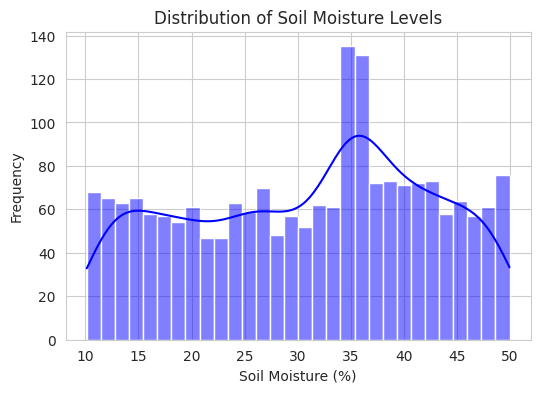

<ipython-input-10-ba0cb5ebad19>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Landslide'], y=df['Vibration Intensity'], palette='coolwarm')


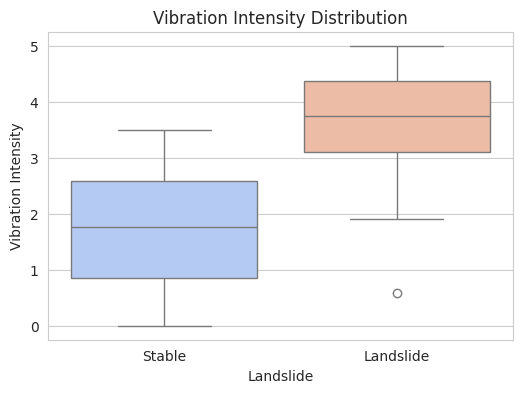

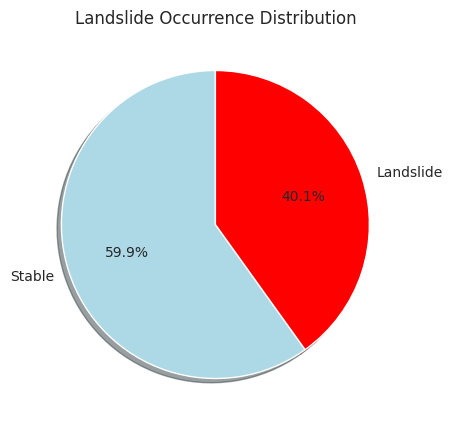

In [10]:
# Set plot style
sns.set_style("whitegrid")

# 1. Histogram - Soil Moisture Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Soil Moisture (%)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Soil Moisture Levels')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot - Vibration Intensity
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Landslide'], y=df['Vibration Intensity'], palette='coolwarm')
plt.title('Vibration Intensity Distribution')
plt.xlabel('Landslide')
plt.ylabel('Vibration Intensity')
plt.xticks([0, 1], ['Stable', 'Landslide'])
plt.show()

# 3. Pie Chart - Landslide vs. Normal Cases
plt.figure(figsize=(5, 5))
labels = ['Stable', 'Landslide']
sizes = df['Landslide'].value_counts()
colors = ['lightblue', 'red']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Landslide Occurrence Distribution')
plt.show()

In [11]:
# Data Scaling using RobustScaler Transform (Data Normalization)

X = df.drop('Landslide', axis=1)
y = df['Landslide']

sc = RobustScaler()
X = sc.fit_transform(X)
display(X)

array([[ 0.76430676,  0.11620547,  0.15620901,  0.26377659],
       [-1.16347722, -0.5611048 , -0.16893566,  0.43991756],
       [-0.90979948,  0.1241609 , -0.61457373, -0.80276739],
       ...,
       [-0.18207201, -0.25288071, -0.64134575, -0.45240645],
       [ 0.35364273,  0.10970165,  1.05723859,  0.66768531],
       [ 0.72685615,  0.48105262,  0.43041802,  0.10367603]])

# Data Splitting

In [12]:
# Dataset splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('training set size: {}, testing set size: {}'.format(X_train.shape, X_test.shape))

training set size: (1600, 4), testing set size: (400, 4)


# Ensemble Machine Learning Model Build

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:34:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters for XGBoost:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Best Hyperparameters for Random Forest:
 RandomForestClassifier(max_depth=10, min_samp

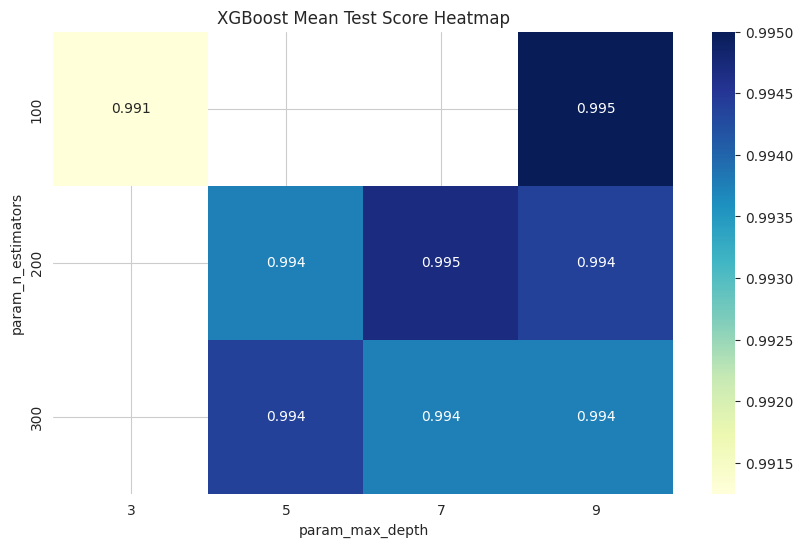

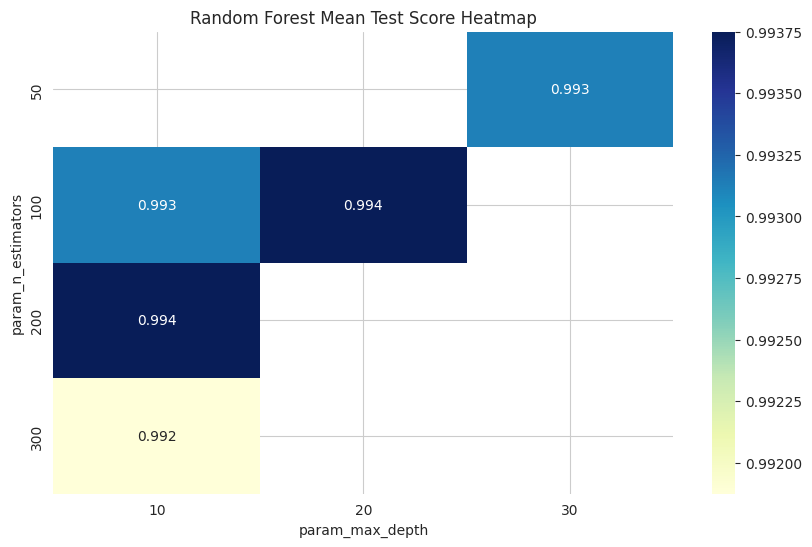

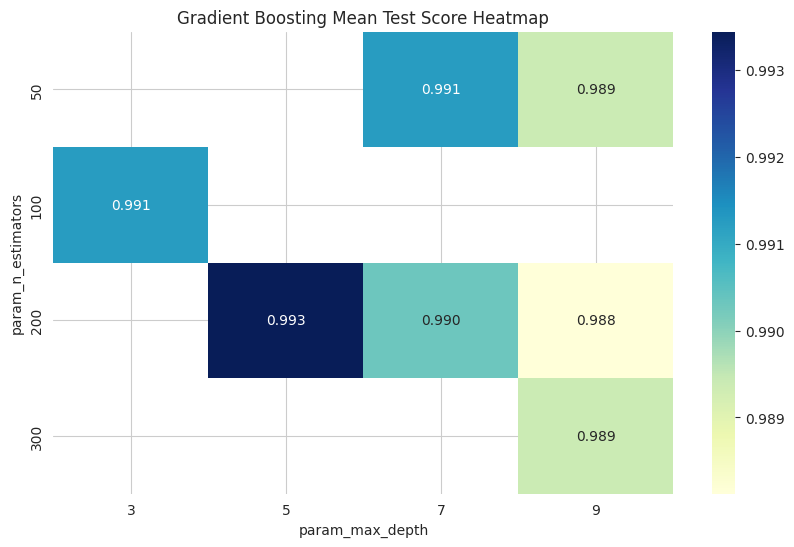


Successfully Built EML Model with RF, XGBoost, and Gradient Boosting!


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()

# Define hyperparameter grids for each model
xgb_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
}

rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

gbm_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Run RandomizedSearchCV for each model
xgb_random = RandomizedSearchCV(xgb, xgb_params, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42, verbose=3)
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42, verbose=3)
gbm_random = RandomizedSearchCV(gbm, gbm_params, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42, verbose=3)

# Fit models on training data
xgb_random.fit(X_train, y_train)
rf_random.fit(X_train, y_train)
gbm_random.fit(X_train, y_train)

# Get the best estimators
best_xgb = xgb_random.best_estimator_
best_rf = rf_random.best_estimator_
best_gbm = gbm_random.best_estimator_

# Print best hyperparameters
print("\nBest Hyperparameters for XGBoost:\n", best_xgb)
print("\nBest Hyperparameters for Random Forest:\n", best_rf)
print("\nBest Hyperparameters for Gradient Boosting:\n", best_gbm)

# Visualization of Hyperparameter Tuning Results
def plot_heatmap(results_df, title, index_col, column_col, value_col):
    pivot = results_df.pivot_table(index=index_col, columns=column_col, values=value_col)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".3f", cbar=True)
    plt.title(title)
    plt.xlabel(column_col)
    plt.ylabel(index_col)
    plt.show()

# Extract hyperparameter results
xgb_results_df = pd.DataFrame(xgb_random.cv_results_)
rf_results_df = pd.DataFrame(rf_random.cv_results_)
gbm_results_df = pd.DataFrame(gbm_random.cv_results_)

# Plot heatmaps
plot_heatmap(xgb_results_df, 'XGBoost Mean Test Score Heatmap', 'param_n_estimators', 'param_max_depth', 'mean_test_score')
plot_heatmap(rf_results_df, 'Random Forest Mean Test Score Heatmap', 'param_n_estimators', 'param_max_depth', 'mean_test_score')
plot_heatmap(gbm_results_df, 'Gradient Boosting Mean Test Score Heatmap', 'param_n_estimators', 'param_max_depth', 'mean_test_score')

# Define the Ensemble Model using VotingClassifier
eml_model = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('gbm', best_gbm)],
    voting='soft'  # Soft voting for probabilistic averaging
)

print("\nSuccessfully Built EML Model with RF, XGBoost, and Gradient Boosting!")


# Train the Ensemble Machine Learning Model

In [14]:
# Train the EML model

eml_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10)),
                             ('gbm',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         max_depth=5,
                                                         min_samples_leaf=4,
                                                         min_samples_split=5,
                                                         n_estimators=200))],
                 voting='soft')

# Model Testing and Evaluation

In [15]:
# Testing

y_pred = eml_model.predict(X_test)
X_test = pd.DataFrame(X_test)
y_pred = np.round(y_pred)

df = pd.DataFrame(y_test)
df['Predicted Result']=y_pred
df = df.rename(columns={'Landslide': 'Actual Result'})
df

,Actual Result,Predicted Result
405,1,1
1190,1,1
1132,1,1
731,1,1
1754,0,0
...,...,...
638,1,1
360,0,0
1810,1,1
1743,0,0


[[234   3]
 [  1 162]]


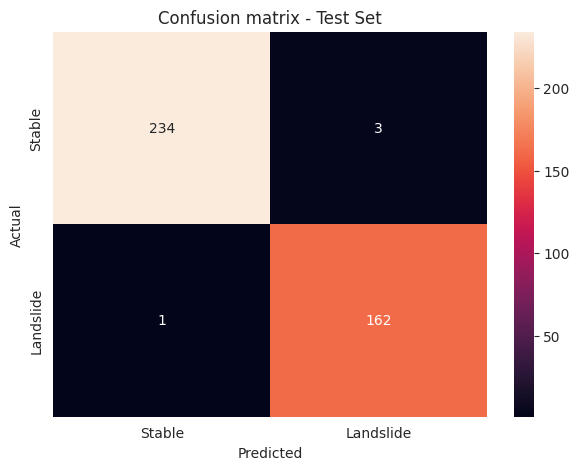

In [16]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plotting the confusion matrix
plt.figure(figsize=(7,5))
lang=['Stable','Landslide']
cm = pd.DataFrame(cm,columns=lang,index=lang)
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Evaluation

# Accuracy
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

# Precision, Recall and F1-Score

print(classification_report(y_test, y_pred, digits=4))


Accuracy on test set: 99.0%
              precision    recall  f1-score   support

           0     0.9957    0.9873    0.9915       237
           1     0.9818    0.9939    0.9878       163

    accuracy                         0.9900       400
   macro avg     0.9888    0.9906    0.9897       400
weighted avg     0.9901    0.9900    0.9900       400



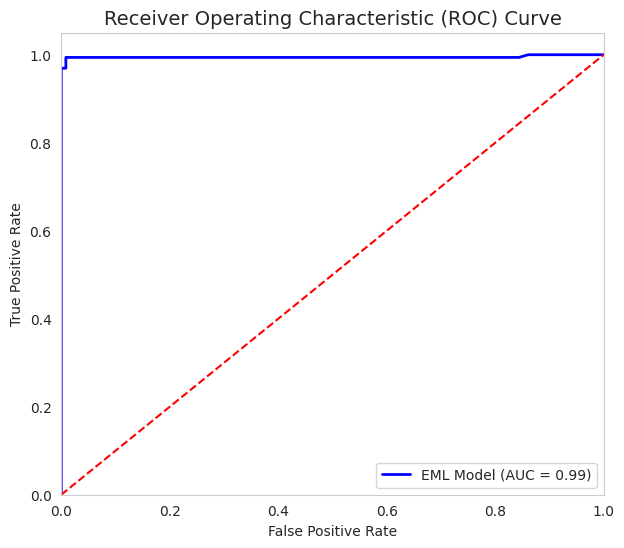

In [18]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np


test_preds_prob = eml_model.predict_proba(X_test)[:, 1]

test_trues = np.array(y_test)

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_trues, test_preds_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'EML Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(False)
plt.show()